data processing ...

In [22]:
!pip install seaborn

In [23]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mlflow
from sklearn.metrics import roc_auc_score, average_precision_score, accuracy_score, precision_score, recall_score, f1_score

In [24]:
df = pd.read_csv("data/heart-disease-problem.csv")

In [25]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [26]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [28]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [29]:
df["sex"].value_counts()

sex
1    207
0     96
Name: count, dtype: int64

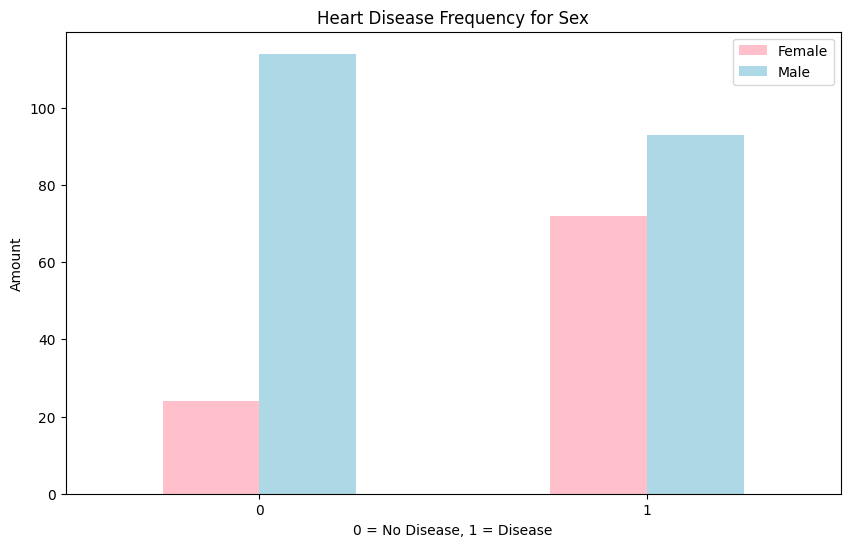

In [30]:
pd.crosstab(df.target, df.sex).plot(kind="bar", figsize=(10,6), color=["pink", "lightblue"])

# Add some attributes to it
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);

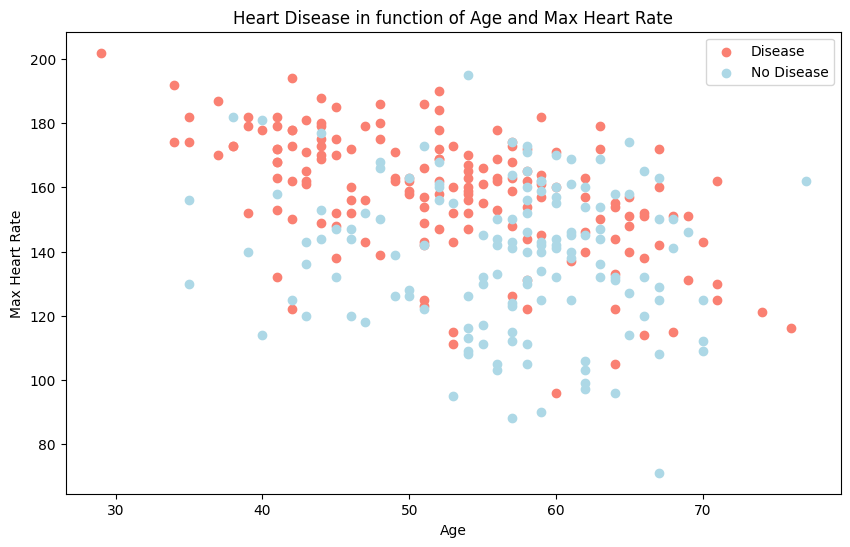

In [31]:
plt.figure(figsize=(10,6))

# Start with positve examples
plt.scatter(df.age[df.target==1], 
            df.thalach[df.target==1], 
            c="salmon") # define it as a scatter figure

# Now for negative examples, we want them on the same plot, so we call plt again
plt.scatter(df.age[df.target==0], 
            df.thalach[df.target==0], 
            c="lightblue") # axis always come as (x, y)

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.legend(["Disease", "No Disease"])
plt.ylabel("Max Heart Rate");

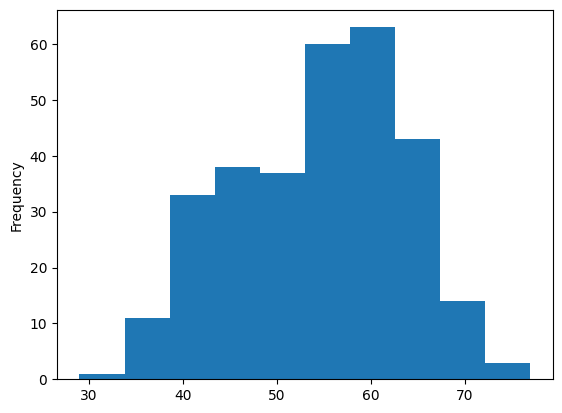

In [32]:
# Histograms are a great way to check the distribution of a variable
df.age.plot.hist();

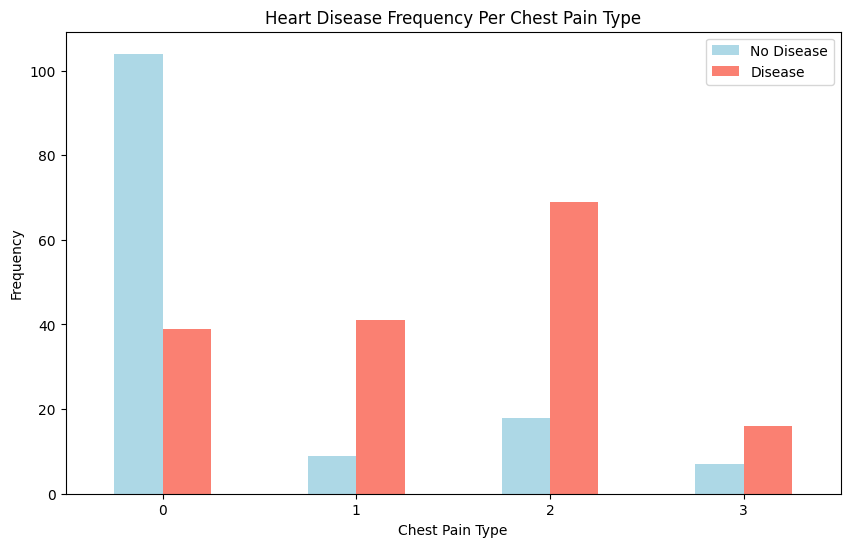

In [33]:
# Create a new crosstab and base plot
pd.crosstab(df.cp, df.target).plot(kind="bar", 
                                   figsize=(10,6), 
                                   color=["lightblue", "salmon"])

# Add attributes to the plot to make it more readable
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Frequency")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation = 0);

In [34]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


Creating the model


In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score


In [36]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [37]:
X = df.drop("target" , axis= 1 )
y = df["target"]

In [38]:
X = np.array(X)
y = np.array(y)

In [39]:
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.2)

In [40]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [77]:
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(), 
          "Random Forest": RandomForestClassifier()}






def eval(X,y,model):

    y_pred = model.predict(X)
    
    return {
        'accuracy': accuracy_score(y, y_pred),
        'precision': precision_score(y, y_pred),
        'recall': recall_score(y, y_pred),
        'f1': f1_score(y, y_pred),
    }



def ml_logs_metrics(metrics,flag = True):

    if(flag == True):
        pre = "val_ "
    else:
        pre = "train_ "

    for name,val in metrics.items():

        met_name = pre + name
        mlflow.log_metric(met_name, val)


def ml_logs_params(params):

    for name,val in params.items():

        mlflow.log_param( name , val)




def fit_and_score(models, X_train, X_test, y_train, y_test):
  
    
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data

        with mlflow.start_run():
        
            model.fit(X_train, y_train)
    
            # y_pred_train = model.predict(X_train)
            train_metrics = eval(X_train,y_train,model)
            ml_logs_metrics(train_metrics,flag = False)
            

            
            # y_pred_val = model.predict(X_test)
            val_metrics = eval(X_test,y_test,model)
            ml_logs_metrics(val_metrics)

            ml_logs_params(model.get_params())
            
            print("Model Name ",name )
            print(val_metrics)
            print()
            print()
    
            
            mlflow.sklearn.log_model(model, name)   

            model_scores[name] = val_metrics["accuracy"]
    
            
    return model_scores

        

In [56]:

model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
# model_scores

Model Name  KNN
{'accuracy': 0.6885245901639344, 'precision': 0.6857142857142857, 'recall': 0.75, 'f1': 0.7164179104477612}




C:\Users\MB16\fullstack_heart_discease_prediction_app\Backend\venv\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
C:\Users\MB16\fullstack_heart_discease_prediction_app\Backend\venv\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
C:\Users\MB16\fullstack_heart_discease_prediction_app\Backend\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number

Model Name  Logistic Regression
{'accuracy': 0.8852459016393442, 'precision': 0.8787878787878788, 'recall': 0.90625, 'f1': 0.8923076923076922}




C:\Users\MB16\fullstack_heart_discease_prediction_app\Backend\venv\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
C:\Users\MB16\fullstack_heart_discease_prediction_app\Backend\venv\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


Model Name  Random Forest
{'accuracy': 0.8360655737704918, 'precision': 0.84375, 'recall': 0.84375, 'f1': 0.84375}




C:\Users\MB16\fullstack_heart_discease_prediction_app\Backend\venv\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
C:\Users\MB16\fullstack_heart_discease_prediction_app\Backend\venv\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


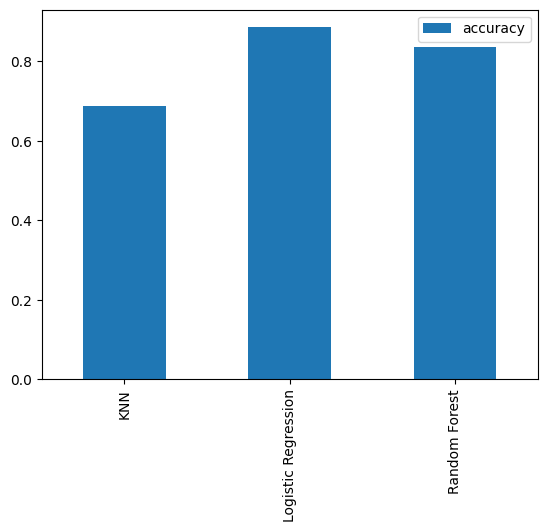

In [57]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar();

hypertuning ..

since,
'Logistic Regression': 0.88, 'Random Forest': 0.83 performs well so neglecting KNeighborsClassifier 


Grid Search can be thought of as an exhaustive search for selecting a model. In Grid Search, the data scientist sets up a grid of hyperparameter values and for each combination, trains a model and scores on the testing data. In this approach, every combination of hyperparameter values is tried which can be very inefficient. For example, searching 20 different parameter values for each of 4 parameters will require 160,000 trials of cross-validation. This equates to 1,600,000 model fits and 1,600,000 predictions if 10-fold cross validation is used. While Scikit Learn offers the GridSearchCV function to simplify the process, it would be an extremely costly execution both in computing power and time. By contrast, Random Search sets up a grid of hyperparameter values and selects random combinations to train the model and score. This allows you to explicitly control the number of parameter combinations that are attempted. The number of search iterations is set based on time or resources. Scikit Learn offers the RandomizedSearchCV function for this process.

https://blog.usejournal.com/a-comparison-of-grid-search-and-randomized-search-using-scikit-learn-29823179bc85


https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html



RandomizedSearchCV ...
RandomForestclassifier

In [58]:
#https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)


{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


For hyperparameter tuning, we perform many iterations of the entire K-Fold CV process, each time using different model settings. We then compare all of the models, select the best one, train it on the full training set, and then evaluate on the testing set. This sounds like an awfully tedious process! Each time we want to assess a different set of hyperparameters, we have to split our training data into K fold and train and evaluate K times. If we have 10 sets of hyperparameters and are using 5-Fold CV, that represents 50 training loops. Fortunately, as with most problems in machine learning, someone has solved our problem and model tuning with K-Fold CV can be automatically implemented in Scikit-Learn.
Random Search Cross Validation in Scikit-Learn
Usually, we only have a vague idea of the best hyperparameters and thus the best approach to narrow our search is to evaluate a wide range of values for each hyperparameter. Using Scikit-Learn’s RandomizedSearchCV method, we can define a grid of hyperparameter ranges, and randomly sample from the grid, performing K-Fold CV with each combination of values.

In [59]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf =  RandomForestClassifier()
# Random search of parameters, using 5 fold cross validation, 
# search across 30 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 30, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


C:\Users\MB16\fullstack_heart_discease_prediction_app\Backend\venv\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
85 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\MB16\fullstack_heart_discease_prediction_app\Backend\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MB16\fullstack_heart_discease_prediction_app\Backend\venv\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\MB16\fullstack_heart_discease_prediction_a

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=30,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [69]:
rf_random.best_params_  

{'n_estimators': 800,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': False}

In [82]:
def save_results(val_metrics, model, name):

    
    ml_logs_metrics(val_metrics)
    ml_logs_params(model.best_params_)
    mlflow.sklearn.log_model(model, name)



In [91]:
res = eval(X_test,y_test,rf_random)
save_results(res, rf_random, "rf_random")
print(res)

{'accuracy': 0.819672131147541, 'precision': 0.8387096774193549, 'recall': 0.8125, 'f1': 0.8253968253968254}


C:\Users\MB16\fullstack_heart_discease_prediction_app\Backend\venv\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
C:\Users\MB16\fullstack_heart_discease_prediction_app\Backend\venv\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


In [110]:
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
tol = [0.001, 0.0003, 0.00001,0.0001]
intercept_scaling = [1.0,2.0]

log_grid = {
    "solver" : solvers , 
    "penalty" : penalty , 
    "C" : c_values,
    "tol" : tol , 
    "intercept_scaling" : intercept_scaling
    
    
}

In [111]:
print(log_grid)

{'solver': ['newton-cg', 'lbfgs', 'liblinear'], 'penalty': ['l2'], 'C': [100, 10, 1.0, 0.1, 0.01], 'tol': [0.001, 0.0003, 1e-05, 0.0001], 'intercept_scaling': [1.0, 2.0]}


In [112]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
lr = LogisticRegression()
# Random search of parameters, using 5 fold cross validation, 
# search across 30 different combinations, and use all available cores
lr_random = RandomizedSearchCV(estimator = lr, param_distributions = log_grid, n_iter = 30, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
lr_random.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=30, n_jobs=-1,
                   param_distributions={'C': [100, 10, 1.0, 0.1, 0.01],
                                        'intercept_scaling': [1.0, 2.0],
                                        'penalty': ['l2'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear'],
                                        'tol': [0.001, 0.0003, 1e-05, 0.0001]},
                   random_state=42, verbose=2)

In [113]:
lr_random.best_params_

{'tol': 1e-05,
 'solver': 'liblinear',
 'penalty': 'l2',
 'intercept_scaling': 2.0,
 'C': 1.0}

In [114]:
res = eval(X_test,y_test,lr_random)
save_results(res, rf_random, "lr_random")


C:\Users\MB16\fullstack_heart_discease_prediction_app\Backend\venv\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
C:\Users\MB16\fullstack_heart_discease_prediction_app\Backend\venv\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


In [115]:
res

{'accuracy': 0.8688524590163934,
 'precision': 0.875,
 'recall': 0.875,
 'f1': 0.875}

cross val score comparison of our base models and the hypertuned models 

In [92]:
def compare(models,x,y,cv):
    scores = {}
    scores_mean = {}
    for name , model in models.items():
       
        score = cross_val_score(model, X, y, cv= cv)
        scores[name] = score
        scores_mean[name] = np.mean(score)
        
    return (scores , scores_mean)
        
        


        
    

In [116]:
models = {
         "Logistic Regression": LogisticRegression(), 
          "Random Forest": RandomForestClassifier() , 
          "log_ht" : LogisticRegression(solver ='liblinear', penalty = 'l2', C = 1.0 , tol = 1e-05, intercept_scaling = 2.0 ) , 
          "ran_ht" : RandomForestClassifier( n_estimators = 800,
                                              min_samples_split = 2,
                                              min_samples_leaf = 1,
                                              max_features = 'sqrt',
                                              max_depth= 20,
                                              bootstrap= False)
    
}




In [120]:
scores = compare(models , X , y , 5)

C:\Users\MB16\fullstack_heart_discease_prediction_app\Backend\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\MB16\fullstack_heart_discease_prediction_app\Backend\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    htt

In [121]:
scores

({'Logistic Regression': array([0.81967213, 0.86885246, 0.85245902, 0.85      , 0.75      ]),
  'Random Forest': array([0.85245902, 0.91803279, 0.81967213, 0.8       , 0.78333333]),
  'log_ht': array([0.81967213, 0.86885246, 0.85245902, 0.86666667, 0.75      ]),
  'ran_ht': array([0.81967213, 0.90163934, 0.78688525, 0.78333333, 0.76666667])},
 {'Logistic Regression': 0.8281967213114754,
  'Random Forest': 0.8346994535519124,
  'log_ht': 0.8315300546448088,
  'ran_ht': 0.811639344262295})

After applying RandomizedSearchCV, an advanced hyperparameter optimization technique, the performance of the Logistic Regression model demonstrated a notable improvement. The carefully tuned hyperparameters led to enhanced predictive capabilities, making this updated model the preferred choice. However, interestingly, the results for the Random Forest model exhibited a decrease in performance following the same hyperparameter optimization process. This serves as a reminder that hyperparameter tuning can have varying effects on different algorithms. In this scenario, the improved Logistic Regression model showcases the potential of hyperparameter optimization in refining models, even as it underscores the importance of algorithm-specific fine-tuning.

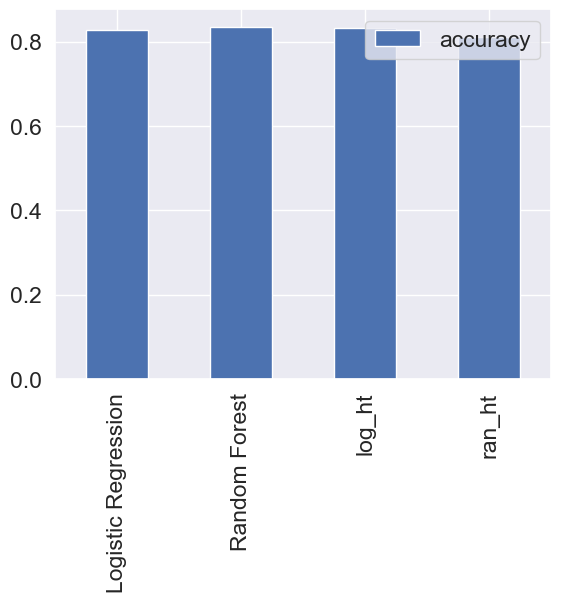

In [122]:
compare_modl = pd.DataFrame(scores[1], index=['accuracy'])
compare_modl.T.plot.bar();

In [123]:
lg = models["log_ht"]

lg.fit(X_train,y_train)
y_preds = lg.predict(X_test)

In [124]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

Confusion matrix 


A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. The confusion matrix itself is relatively simple to understan



In [125]:
# Display confusion matrix
confusion_matrix(y_test, y_preds)

array([[25,  4],
       [ 4, 28]], dtype=int64)

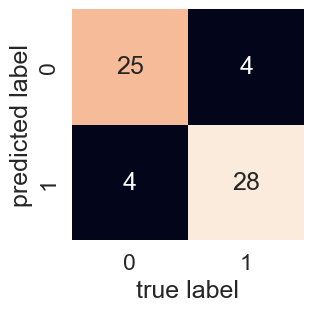

In [126]:
# Import Seaborn
import seaborn as sns
sns.set(font_scale=1.5) # Increase font size

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test, y_preds)

Classification report

In [128]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



saving the model .....

1. now we train our best model with the full dataset 
2. save the model using pickle 

In [129]:
# Saving a model with pickle
import pickle

# Save an existing model to file
pickle.dump(lg, open("models/heart_dis_lg_hp.pkl", "wb"))

In [130]:
loaded_pickle_model = pickle.load(open("models/heart_dis_lg_hp.pkl", "rb"))

In [131]:
loaded_pickle_model.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)